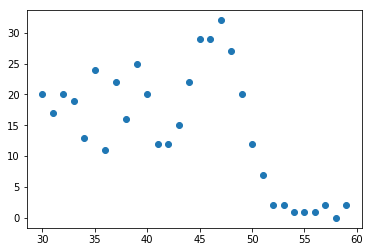

In [5]:
import numpy as np
import pandas as pd
import scipy.optimize as optimization
import matplotlib.pyplot as plt

filename = '../data/100_1113.txt'

channel = np.linspace(0,255, num=256)
values = np.loadtxt(filename)
plotFrom = 30
plotTo = 60
plt.scatter(channel[plotFrom:plotTo], values[plotFrom:plotTo])

[ 4.65909669e+01  1.33078462e+00  7.86440467e+01  1.87795502e+02
 -6.44004058e-02] [3.20404792e-01 3.35260759e-01 2.55939884e+01 2.68900454e+02
 3.79016687e-02]


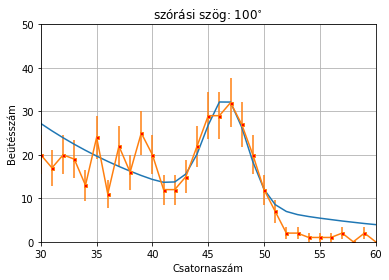

In [38]:
error = np.sqrt(values)

startVal = 35
endVal = 52

def gauss(x, m, s, A, bA, bb):
    return A/(np.sqrt(2*np.pi)*s)*np.exp(-((x-m)/(2*s))**2) + bA*np.exp(bb*x)

x0 = np.array([47.,3., 32., 3300., -.13])

params, cov = optimization.curve_fit(gauss, channel[startVal:endVal], values[startVal:endVal],
                                     x0, error[startVal:endVal])
perr = np.sqrt(np.diag(cov))

plt.plot(channel, gauss(channel, *params))
plt.errorbar(channel, values, error, marker='s', mfc='red', ms=3)
plt.xlim(plotFrom,plotTo)
plt.ylim(0,50)
plt.title('szórási szög: 100$^{\circ}$')
plt.xlabel('Csatornaszám')
plt.ylabel('Beütésszám')
plt.grid(True)
plt.savefig('../plots/withbackground/100_1113fit.png')

print(params, perr)

In [4]:
np.savetxt('../gaussfits/withbackground/100_1113fit.dat', (params, perr))